<a href="https://colab.research.google.com/github/rbauza7/Examen-Final-Ej-2/blob/main/2RBF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar R en Google Colab
!apt-get install -y r-base

# Instalar IRKernel para ejecutar R
!R -e "install.packages('IRkernel'); IRkernel::installspec(user = FALSE)"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.

R version 4.4.2 (2024-10-31) -- "Pile of Leaves"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages('IRkernel'); IRkernel::installspec(user = FALSE)
Installing package into ‘/usr/local

In [4]:
# Instalar librería para trabajar con archivos Excel
install.packages("readxl")
library(readxl)

# Enlace directo al archivo Excel en GitHub
url <- "https://github.com/rbauza7/Examen-Final-Ej-2/raw/refs/heads/main/tabla_calidad_agua.xlsx"

# Descargar el archivo temporalmente
temp_file <- tempfile(fileext = ".xlsx")
download.file(url, temp_file, mode = "wb")

# Leer el archivo Excel
datos <- read_excel(temp_file)

# Mostrar los datos
print(datos)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# A tibble: 11 × 6
   `Color del agua` Olor         `Residuos sólidos` `Presencia de contaminantes`
   <chr>            <chr>        <chr>              <chr>                       
 1 Claro            Sin olor     No                 No                          
 2 Claro            Sin olor     No                 No                          
 3 Claro            Desagradable Sí                 Sí                          
 4 Claro            Desagradable No                 Sí                          
 5 Turbio           Sin olor     Sí                 Sí                          
 6 Turbio           Sin olor     No                 Sí                          
 7 Turbio           Desagradable Sí                 Sí                          
 8 Claro            Desagradable No                 No                          
 9 Turbio           Desagradable Sí                 Sí                          
10 Turbio           Sin olor     Sí                 Sí                          
11 Turbio

**Calcular la entropía inicial**

In [5]:
# Calcular la proporción de cada clase
tabla_respuesta <- table(datos$Respuesta)
proporciones <- prop.table(tabla_respuesta)

# Calcular la entropía
entropia_inicial <- -sum(proporciones * log2(proporciones))

# Mostrar la entropía inicial
print(paste("Entropía inicial:", entropia_inicial))


[1] "Entropía inicial: 0.684038435639042"


Gananacia de informacion (GI)

Agua

In [6]:
# Función para calcular entropía
calcular_entropia <- function(tabla) {
  proporciones <- prop.table(tabla)
  -sum(proporciones * log2(proporciones), na.rm = TRUE)
}

# Dividir los datos según "Color del agua"
grupos_color <- split(datos, datos$`Color del agua`)

# Calcular la entropía ponderada para "Color del agua"
entropia_color <- sum(sapply(grupos_color, function(grupo) {
  n <- nrow(grupo) / nrow(datos)  # Proporción del grupo
  n * calcular_entropia(table(grupo$Respuesta))  # Entropía ponderada
}))

# Calcular ganancia de información
ganancia_color <- entropia_inicial - entropia_color

# Mostrar el resultado
print(paste("Ganancia de información para 'Color del agua':", ganancia_color))


[1] "Ganancia de información para 'Color del agua': 0.242697256341465"


Olor

In [7]:
# Dividir los datos según "Olor"
grupos_olor <- split(datos, datos$Olor)

# Calcular la entropía ponderada para "Olor"
entropia_olor <- sum(sapply(grupos_olor, function(grupo) {
  n <- nrow(grupo) / nrow(datos)  # Proporción del grupo
  n * calcular_entropia(table(grupo$Respuesta))  # Entropía del grupo
}))

# Calcular la ganancia de información
ganancia_olor <- entropia_inicial - entropia_olor

# Mostrar el resultado
print(paste("Ganancia de información para 'Olor':", ganancia_olor))


[1] "Ganancia de información para 'Olor': 0.242697256341465"


Residuos sólidos

In [8]:
# Dividir los datos según "Residuos sólidos"
grupos_residuos <- split(datos, datos$`Residuos sólidos`)

# Calcular la entropía ponderada para "Residuos sólidos"
entropia_residuos <- sum(sapply(grupos_residuos, function(grupo) {
  n <- nrow(grupo) / nrow(datos)  # Proporción del grupo
  n * calcular_entropia(table(grupo$Respuesta))  # Entropía del grupo
}))

# Calcular la ganancia de información
ganancia_residuos <- entropia_inicial - entropia_residuos

# Mostrar el resultado
print(paste("Ganancia de información para 'Residuos sólidos':", ganancia_residuos))


[1] "Ganancia de información para 'Residuos sólidos': 0.183149798882047"


Presencia de contaminantes

In [9]:
# Dividir los datos según "Presencia de contaminantes"
grupos_contaminantes <- split(datos, datos$`Presencia de contaminantes`)

# Calcular la entropía ponderada para "Presencia de contaminantes"
entropia_contaminantes <- sum(sapply(grupos_contaminantes, function(grupo) {
  n <- nrow(grupo) / nrow(datos)  # Proporción del grupo
  n * calcular_entropia(table(grupo$Respuesta))  # Entropía del grupo
}))

# Calcular la ganancia de información
ganancia_contaminantes <- entropia_inicial - entropia_contaminantes

# Mostrar el resultado
print(paste("Ganancia de información para 'Presencia de contaminantes':", ganancia_contaminantes))


[1] "Ganancia de información para 'Presencia de contaminantes': 0.320402072002678"


Nivel d epH

In [10]:
# Dividir los datos según "Nivel de pH"
grupos_ph <- split(datos, datos$`Nivel de pH`)

# Calcular la entropía ponderada para "Nivel de pH"
entropia_ph <- sum(sapply(grupos_ph, function(grupo) {
  n <- nrow(grupo) / nrow(datos)  # Proporción del grupo
  n * calcular_entropia(table(grupo$Respuesta))  # Entropía del grupo
}))

# Calcular la ganancia de información
ganancia_ph <- entropia_inicial - entropia_ph

# Mostrar el resultado
print(paste("Ganancia de información para 'Nivel de pH':", ganancia_ph))


[1] "Ganancia de información para 'Nivel de pH': 0.433594117260545"


Si la ganancia de información (GI) para la variable "Nivel de pH" es la mayor entre todas las variables, entonces esa será seleccionada como el nodo raíz del árbol de decisión.

n= 11 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 11 2 No apta (0.1818182 0.8181818)  
  2) Nivel de pH=Normal 3 1 Apta (0.6666667 0.3333333)  
    4) Olor=Sin olor 2 0 Apta (1.0000000 0.0000000) *
    5) Olor=Desagradable 1 0 No apta (0.0000000 1.0000000) *
  3) Nivel de pH=Alto,Bajo 8 0 No apta (0.0000000 1.0000000) *


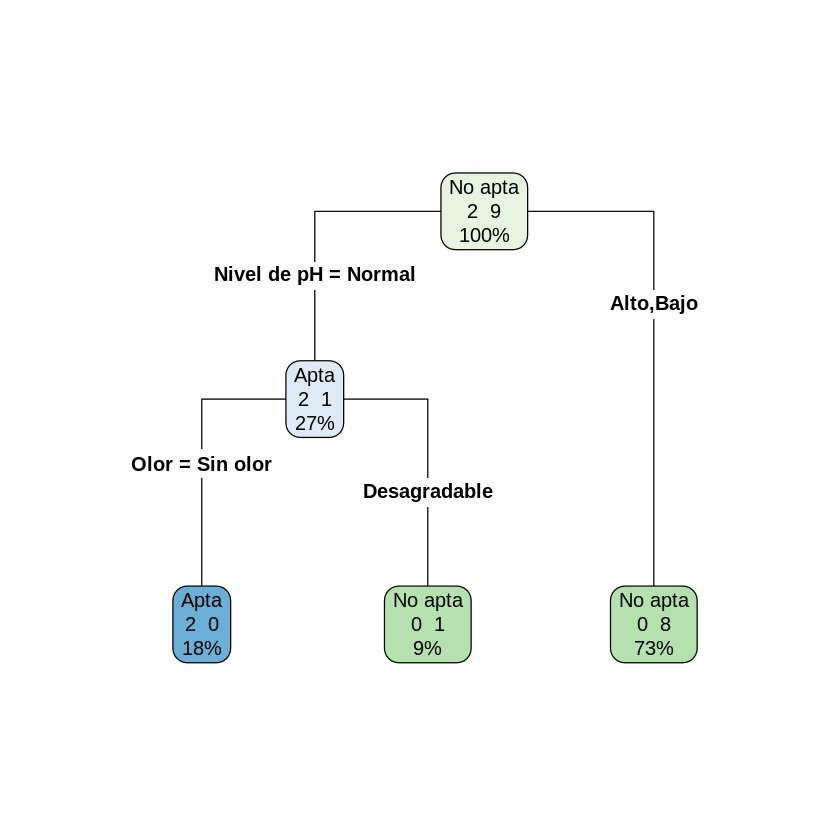

In [12]:
# Crear el modelo del árbol de decisión con ajustes
modelo_arbol <- rpart(
  Respuesta ~ .,
  data = datos,
  method = "class",
  parms = list(split = "information"),  # Usar ganancia de información
  control = rpart.control(minsplit = 1, cp = 0.01)  # Permitir más divisiones
)

# Visualizar el árbol de decisión
rpart.plot(modelo_arbol, type = 4, extra = 101)

# Mostrar los detalles del árbol
print(modelo_arbol)
